In [34]:
using Pkg
envpath = expanduser("~/envs/d11/")
Pkg.activate(envpath)

using DataFrames
using CSV
using Images
using Plots

  Activating project at `~/envs/d11`


In [35]:
# Read the CSV file
df = CSV.read("ht.csv", DataFrame)
df = sort(df, :T)

min_loss, min_loss_T = findmin(df.validloss)

(0.60852855, 1)

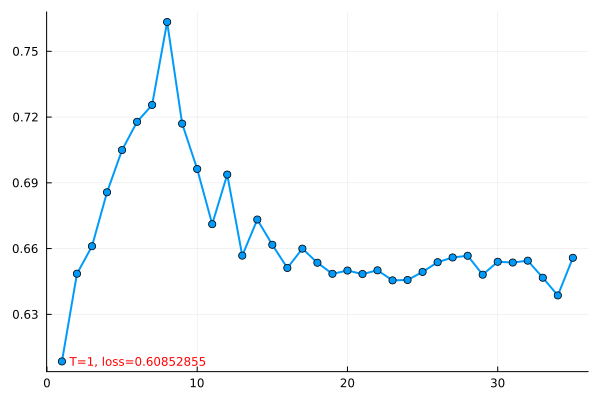

In [36]:

p = plot(df.T, df.validloss,
        # title="Encoder temperature search",
        # xlabel="Temperature",
        # ylabel="Distillation loss",
        # label=false,
        linewidth=2,
        markershape=:circle,
        # label="COCO",
        # legend=:bottomright,
        label=false,
)
annotate!(min_loss_T, min_loss,
        text("  T=$min_loss_T, loss=$min_loss", :left, 8, "red")
)
savefig(p, "ht-mobileunet-encoder.png")
display(p)

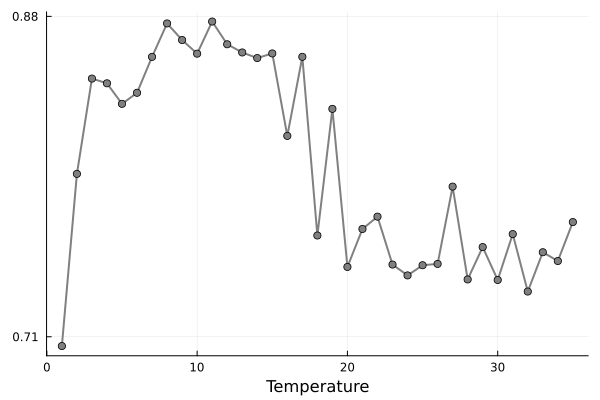

In [37]:
# pascalvoc plot
path = "~/projects/kd-mobileunet/hypertuning/encoder/"
path = expanduser(path)
dfpvoc = CSV.read(joinpath(path, "ht.csv"), DataFrame)
dfpvoc = sort(dfpvoc, :T)

p2 = plot(dfpvoc.T, dfpvoc.loss,
            xlabel="Temperature",
            linewidth=2,
            markershape=:circle,
            label="PascalVOC",
            legend=false,
            color=:gray,
)
yticks!(round.([minimum(dfpvoc.loss), maximum(dfpvoc.loss)], digits=2))

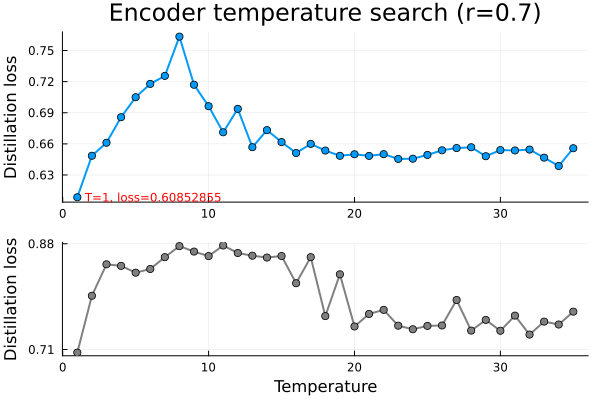

In [38]:
using Statistics
r = cor(df.validloss, dfpvoc.loss)

pcomp = plot(p, p2, layout = @layout([a; b{0.4h}]),
    plot_title="Encoder temperature search (r=$(round(r, digits=2)))",
    ylabel="Distillation loss",
)
savefig(pcomp, "ht-mobileunet-encoder-compare.png")
display(pcomp)

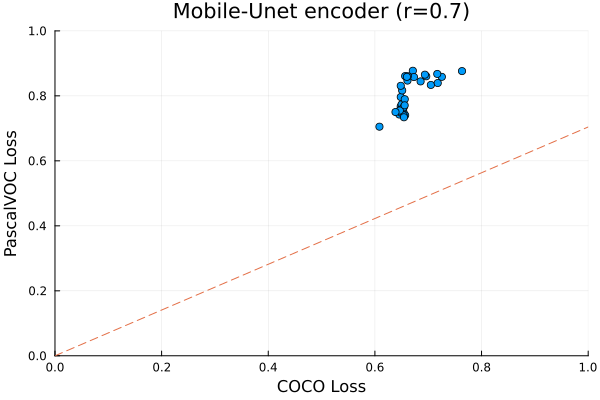

In [39]:
ls = (0, 1)
ab=scatter(df.validloss, dfpvoc.loss,
    xlabel="COCO Loss",
    ylabel="PascalVOC Loss",
    label=false,
    title="Mobile-Unet encoder (r=$(round(r, digits=2)))",
    x_lims=ls,
    y_lims=ls,
)
Plots.abline!(r,0, line=:dash, label=:false)
savefig(ab, "ht-mobileunet-encoder-correlation.png")
display(ab)